In [46]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
%matplotlib inline

In [47]:
df1 = pd.read_csv('../UWA-Project_3/Resources/wa_hs_atar_2016.csv')
df1 = df1[['School','Year','Median ATAR']]
df2 = pd.read_csv('../UWA-Project_3/Resources/wa_hs_atar_2017.csv')
df2 = df2[['School','Year','Median ATAR']]
df3 = pd.read_csv('../UWA-Project_3/Resources/wa_hs_atar_2018.csv')
df3 = df3[['School','Year','Median ATAR']]
df4 = pd.read_csv('../UWA-Project_3/Resources/wa_hs_atar_2019.csv')
df4 = df4[['School','Year','Median ATAR']]
df5 = pd.read_csv('../UWA-Project_3/Resources/wa_hs_atar_2020.csv')
df5 = df5[['School','Year','Median ATAR']]

In [48]:
mergedDf = df1.merge(df2, on='School')
mergedDf=mergedDf.rename(columns={"Year_x": "Year_16", "Median ATAR_x":"ATAR_16",
"Year_y": "Year_17", "Median ATAR_y":"ATAR_17"})

In [49]:
mergedDf1 = df3.merge(df4, on='School')
mergedDf1=mergedDf1.rename(columns={"Year_x": "Year_18", "Median ATAR_x":"ATAR_18",
"Year_y": "Year_19", "Median ATAR_y":"ATAR_19"})

In [50]:
mergedDf2 = mergedDf.merge(mergedDf1, on='School')

In [51]:
mergedDf3 = mergedDf2.merge(df5, on='School')
df = mergedDf3.rename(columns={"Year_x_x": "Year_16", "Median ATAR_x_x":"ATAR_16",
"Year_y_x": "Year_17", "Median ATAR_y_x":"ATAR_17","Year_x_y": "Year_18", "Median ATAR_x_y":"ATAR_18","Year_y_y": "Year_19", "Median ATAR_y_y":"ATAR_19","Year": "Year_20", "Median ATAR":"ATAR_20"})
df

,School,Year_16,ATAR_16,Year_17,ATAR_17,Year_18,ATAR_18,Year_19,ATAR_19,Year_20,ATAR_20
0,Perth Modern School,2016,95.55,2017,95.90,2018,97.00,2019,96.75,2020,97.55
1,Presbyterian Ladies' College,2016,92.90,2017,89.60,2018,86.90,2019,90.75,2020,89.20
2,Penrhos College,2016,92.65,2017,91.20,2018,88.15,2019,88.30,2020,90.65
3,Christ Church Grammar School,2016,92.50,2017,92.45,2018,91.60,2019,92.50,2020,92.50
4,Santa Maria College,2016,91.85,2017,89.90,2018,90.10,2019,87.45,2020,89.35
...,...,...,...,...,...,...,...,...,...,...,...
116,Quinns Baptist College,2016,63.65,2017,66.60,2018,76.45,2019,73.15,2020,66.90
117,Atwell College,2016,62.90,2017,72.75,2018,64.90,2019,70.85,2020,64.05
118,Halls Head College,2016,62.30,2017,61.15,2018,61.20,2019,61.20,2020,69.95
119,Ellenbrook Christian College,2016,60.75,2017,72.20,2018,63.75,2019,72.50,2020,75.65


In [52]:
# for date, row in df.T.iteritems():
#    print (row['Year_16'], row['Year_17'], row['Year_18'], row['Year_19'], row['Year_20'])
#    X_train = row['Year_16'], row['Year_17'], row['Year_18'], row['Year_19']
    # X_train = list(X_train)
    # X_train=[[j] for j in X_train]
    # X_train = np.array(X_train) 
    # X_test = [df['Year_20'][i]]
    # y_train = (df['ATAR_16'][i], df['ATAR_17'][i], df['ATAR_18'][i], df['ATAR_19'][i])
    # y_train = list(y_train)
    # y_train=[[j] for j in y_train]
    # y_train = np.array(y_train) 
    # y_test = (df['ATAR_20'][i])
    # from sklearn.linear_model import LinearRegression
    # regressor = LinearRegression()
    # reg = regressor.fit(X_train, y_train)
    # print(regressor.intercept_)
    # print(regressor.coef_)
    # X_2020 = np.array(X_test)
    # X_2020 = X_2020.reshape(-1, 1)
    # y_pred = reg.predict(X_2020)
    # print(y_pred)
    # y_pred = y_pred[0]
    # predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    # from sklearn import metrics
    # print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    # print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    # print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [53]:
# for each school 
school_name_array = [] 
y_test_array = [] 
y_pred_array = [] 


for i in df.index : 
    X_train = df['Year_16'][i], df['Year_17'][i], df['Year_18'][i], df['Year_19'][i]
    X_train = list(X_train)
    X_train=[[j] for j in X_train]
    X_train = np.array(X_train) 
    X_test = [df['Year_20'][i]]
    y_train = (df['ATAR_16'][i], df['ATAR_17'][i], df['ATAR_18'][i], df['ATAR_19'][i])
    y_train = list(y_train)
    y_train=[[j] for j in y_train]
    y_train = np.array(y_train) 
    y_test = (df['ATAR_20'][i])
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    reg = regressor.fit(X_train, y_train) # train schoool using 16-19. 
    print(regressor.intercept_)
    print(regressor.coef_)
    X_2020 = np.array(X_test)
    X_2020 = X_2020.reshape(-1, 1)
    y_pred = reg.predict(X_2020) # predict 2020 
    print(y_pred)
    y_pred = y_pred[0] 
    predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # compare 2020 pred vs actual 
    school_name_array.append(df.iloc[i]["School"])
    y_test_array.append(y_test)
    y_pred_array.append(y_pred[0])
    # from sklearn import metrics
    # print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    # print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    # print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
predicted_df = pd.DataFrame({'School': school_name_array, 'Actual': y_test_array, 'Predicted': y_pred_array})

[-851.925]
[[0.47]]
[[97.475]]
[1936.05]
[[-0.915]]
[[87.75]]
[3338.25]
[[-1.61]]
[[86.05]]
[263.75]
[[-0.085]]
[[92.05]]
[2712.575]
[[-1.3]]
[[86.575]]
[1513.925]
[[-0.705]]
[[89.825]]
[785.525]
[[-0.345]]
[[88.625]]
[-594.8]
[[0.34]]
[[92.]]
[-606.1]
[[0.345]]
[[90.8]]
[1107.7]
[[-0.505]]
[[87.6]]
[-1775.85]
[[0.925]]
[[92.65]]
[3709.875]
[[-1.795]]
[[83.975]]
[1802.975]
[[-0.85]]
[[85.975]]
[663.125]
[[-0.285]]
[[87.425]]
[-436.1]
[[0.26]]
[[89.1]]
[127.25]
[[-0.02]]
[[86.85]]
[138.]
[[-0.025]]
[[87.5]]
[5034.775]
[[-2.455]]
[[75.675]]
[2736.525]
[[-1.315]]
[[80.225]]
[-407.825]
[[0.245]]
[[87.075]]
[1023.9]
[[-0.465]]
[[84.6]]
[3714.05]
[[-1.8]]
[[78.05]]
[326.775]
[[-0.12]]
[[84.375]]
[135.95]
[[-0.025]]
[[85.45]]
[657.7]
[[-0.285]]
[[82.]]
[-578.875]
[[0.33]]
[[87.725]]
[3531.65]
[[-1.71]]
[[77.45]]
[307.225]
[[-0.11]]
[[85.025]]
[443.8]
[[-0.18]]
[[80.2]]
[1708.725]
[[-0.805]]
[[82.625]]
[899.4]
[[-0.405]]
[[81.3]]
[-2767.725]
[[1.415]]
[[90.575]]
[3029.25]
[[-1.46]]
[[80.05]]
[

In [54]:
X_train

array([[2016],
       [2017],
       [2018],
       [2019]], dtype=int64)

In [55]:
y_pred

array([70.875])

In [56]:
predicted_df

,School,Actual,Predicted
0,Perth Modern School,97.55,97.475
1,Presbyterian Ladies' College,89.20,87.750
2,Penrhos College,90.65,86.050
3,Christ Church Grammar School,92.50,92.050
4,Santa Maria College,89.35,86.575
...,...,...,...
116,Quinns Baptist College,66.90,79.550
117,Atwell College,64.05,71.850
118,Halls Head College,69.95,60.650
119,Ellenbrook Christian College,75.65,74.000


## jonathan's updated code

In [57]:
# for each school 
school_name_array = [] 
y_test_array = [] 
y_pred_array = [] 
mae_array = [] 
mse_array = [] 
rmse_array = [] 
from sklearn import metrics
for i in df.index : 
    X_train = df['Year_16'][i], df['Year_17'][i], df['Year_18'][i], df['Year_19'][i]
    X_train = list(X_train)
    X_train=[[j] for j in X_train]
    X_train = np.array(X_train) 
    X_test = [df['Year_20'][i]]
    y_train = (df['ATAR_16'][i], df['ATAR_17'][i], df['ATAR_18'][i], df['ATAR_19'][i])
    y_train = list(y_train)
    y_train=[[j] for j in y_train]
    y_train = np.array(y_train) 
    y_test = (df['ATAR_20'][i])
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    reg = regressor.fit(X_train, y_train) # train schoool using 16-19. 
    # print(regressor.intercept_)
    # print(regressor.coef_)
    X_2020 = np.array(X_test)
    X_2020 = X_2020.reshape(-1, 1)
    y_pred = reg.predict(X_2020) # predict 2020 
    # print(y_pred)
    y_pred = y_pred[0] 
    predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # compare 2020 pred vs actual 
    school_name_array.append(df.iloc[i]["School"])
    y_test_array.append(y_test)
    y_pred_array.append(y_pred[0])
    mae_array.append(metrics.mean_absolute_error([y_test], y_pred))
    mse_array.append(metrics.mean_squared_error([y_test], y_pred)) 
    rmse_array.append(np.sqrt(metrics.mean_squared_error([y_test], y_pred))) 
    # print('Mean Absolute Error:', metrics.mean_absolute_error([y_test], y_pred))
    # print('Mean Squared Error:', metrics.mean_squared_error([y_test], y_pred))
    # print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error([y_test], y_pred)))
predicted_df = pd.DataFrame({'School': school_name_array, 'Actual': y_test_array, 'Predicted': y_pred_array, 'MAE': mae_array, 'MSE': mse_array, 'RMSE': rmse_array})
predicted_df

,School,Actual,Predicted,MAE,MSE,RMSE
0,Perth Modern School,97.55,97.475,0.075,0.005625,0.075
1,Presbyterian Ladies' College,89.20,87.750,1.450,2.102500,1.450
2,Penrhos College,90.65,86.050,4.600,21.160000,4.600
3,Christ Church Grammar School,92.50,92.050,0.450,0.202500,0.450
4,Santa Maria College,89.35,86.575,2.775,7.700625,2.775
...,...,...,...,...,...,...
116,Quinns Baptist College,66.90,79.550,12.650,160.022500,12.650
117,Atwell College,64.05,71.850,7.800,60.840000,7.800
118,Halls Head College,69.95,60.650,9.300,86.490000,9.300
119,Ellenbrook Christian College,75.65,74.000,1.650,2.722500,1.650


In [93]:
# Filter the top 17 schools from 2016-2019
predicted_17 = predicted_df.loc[(predicted_df['School'] == 'Perth Modern School') | (predicted_df['School'] == "Presbyterian Ladies' College") |
                                (predicted_df['School'] == 'Penrhos College') | (predicted_df['School'] == 'Christ Church Grammar School') |
                                (predicted_df['School'] == 'Santa Maria College') | (predicted_df['School'] == "St Hilda's Anglican School for Girls") |
                                (predicted_df['School'] == 'Perth College') | (predicted_df['School'] == "St Mary's Anglican Girls' School") |
                                (predicted_df['School'] == "Methodist Ladies' College") | (predicted_df['School'] == 'Shenton College') |
                                (predicted_df['School'] == "Hale School") | (predicted_df['School'] == "Carmel School") |
                                (predicted_df['School'] == "John XXIII College") | (predicted_df['School'] == "Rossmoyne Senior High School") |
                                (predicted_df['School'] == "Ursula Frayne Catholic College") | (predicted_df['School'] == "Wesley College") |
                                (predicted_df['School'] == "Manjimup Senior High School"), :]
predicted_17

,School,Actual,Predicted,MAE,MSE,RMSE
0,Perth Modern School,97.55,97.475,0.075,0.005625,0.075
1,Presbyterian Ladies' College,89.20,87.750,1.450,2.102500,1.450
2,Penrhos College,90.65,86.050,4.600,21.160000,4.600
3,Christ Church Grammar School,92.50,92.050,0.450,0.202500,0.450
4,Santa Maria College,89.35,86.575,2.775,7.700625,2.775
5,St Hilda's Anglican School for Girls,92.70,89.825,2.875,8.265625,2.875
6,Perth College,89.40,88.625,0.775,0.600625,0.775
7,St Mary's Anglican Girls' School,90.30,92.000,1.700,2.890000,1.700
8,Methodist Ladies' College,90.55,90.800,0.250,0.062500,0.250
9,Shenton College,88.60,87.600,1.000,1.000000,1.000


In [59]:
# read the union(ed) table
df_union = pd.read_csv("../UWA-Project_3/Resources/wa_hs_atar_ratings_full.csv")
df_union

,Year,Rank,School,Median ATAR,No. eligible Yr 12 students,No. Students with an ATAR,Percentage of students with an ATAR,Longitude,Latitude,Sector,Gender,Religion
0,2016,1,Perth Modern School,95.55,222,220,99.10,115.836396,-31.945066,Government,Co-ed,Secular
1,2016,2,Presbyterian Ladies' College,92.90,122,110,90.16,115.764906,-31.993592,Non-government,Girls,Uniting
2,2016,3,Penrhos College,92.65,145,123,84.83,115.872539,-31.997431,Non-government,Girls,Uniting
3,2016,4,Christ Church Grammar School,92.50,188,171,90.96,115.776987,-31.985461,Non-government,Boys,Anglican
4,2016,5,Santa Maria College,91.85,189,151,79.89,115.795823,-32.018614,Non-government,Girls,Catholic
...,...,...,...,...,...,...,...,...,...,...,...,...
713,2020,135,Balcatta Senior High School,60.40,76,20,26.32,115.812243,-31.875517,Government,Co-ed,Secular
714,2020,136,Safety Bay Senior High School,58.75,115,23,20.00,115.740964,-32.303286,Government,Co-ed,Secular
715,2020,137,Darling Range Sports College,52.40,129,44,34.11,116.010860,-31.975661,Government,Co-ed,Secular
716,2020,138,Gilmore College,52.25,141,23,16.31,115.814803,-32.238266,Government,Co-ed,Secular


In [60]:
# Create a dataframe for Perth Modern School 2016-2019
df = pd.DataFrame({"Year": [2016, 2017, 2018, 2019],
                   "Score": [95.55, 95.9, 97, 96.75]})
df

,Year,Score
0,2016,95.55
1,2017,95.90
2,2018,97.00
3,2019,96.75


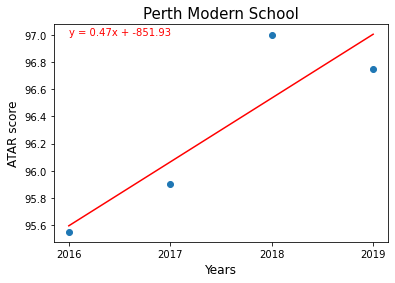

In [61]:
# Check the relationship between the data
x_values = df["Year"]
y_values = df["Score"]
year_count = df["Year"]
plt.scatter(x_values, y_values)
plt.xticks(year_count)
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(2016, 97),fontsize=10,color="red")  
plt.xlabel("Years", fontsize = 12)
plt.ylabel("ATAR score", fontsize = 12)
plt.title("Perth Modern School", fontsize = 15)
plt.show()

In [62]:
# split the data into training and test sets. 
# Script below splits 80% of the data to training set while 20% of the data to test set.
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
X_train = df["Year"].values.reshape(-1, 1)
X_test = [2020]
y_train = df["Score"].values.reshape(-1, 1)
y_test = [97.55]

In [64]:
X_train

array([[2016],
       [2017],
       [2018],
       [2019]], dtype=int64)

In [65]:
y_train

array([[95.55],
       [95.9 ],
       [97.  ],
       [96.75]])

In [66]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reg = regressor.fit(X_train, y_train)

In [67]:
# To retrieve the intercept:
print(regressor.intercept_)

[-851.925]


In [68]:
# For retrieving the slope (coefficient of x):
print(regressor.coef_)

[[0.47]]


In [69]:
X_2020 = np.array(X_test)

In [70]:
X_2020

array([2020])

In [71]:
X_2020 = X_2020.reshape(-1, 1)

In [72]:
X_2020

array([[2020]])

In [73]:
# Making Predictions
y_pred = reg.predict(X_2020)
y_pred

array([[97.475]])

In [74]:
y_pred = y_pred[0]
y_pred

array([97.475])

In [75]:
# To compare the actual output values for x_test with the predicted values
predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predict

,Actual,Predicted
0,97.55,97.475


In [76]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07499999999997442
Mean Squared Error: 0.0056249999999961635
Root Mean Squared Error: 0.07499999999997442


## Making prediction for 2021

In [77]:
predict_2021 = [2021]
X_2021 = np.array(predict_2021)
X_2021

array([2021])

In [78]:
# reshape the data
X_2021 = X_2021.reshape(-1, 1)

In [79]:
# Making Predictions for 2021
y_pred_2021 = reg.predict(X_2021)
y_pred_2021

array([[97.945]])

## Create second model for Perth Modern School 2016-2020

In [80]:
# Create a dataframe for Perth Modern School 2016-2020
df_2020 = pd.DataFrame({"Year": [2016, 2017, 2018, 2019, 2020],
                   "Score": [95.55, 95.9, 97, 96.75, 97.55]})
df_2020

,Year,Score
0,2016,95.55
1,2017,95.90
2,2018,97.00
3,2019,96.75
4,2020,97.55


In [81]:
X_train_2021 = df_2020["Year"].values.reshape(-1, 1)
X_test_2021 = [2021]
y_train_2021 = df_2020["Score"].values.reshape(-1, 1)

In [82]:
X_train_2021

array([[2016],
       [2017],
       [2018],
       [2019],
       [2020]], dtype=int64)

In [83]:
y_train_2021

array([[95.55],
       [95.9 ],
       [97.  ],
       [96.75],
       [97.55]])

In [84]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reg = regressor.fit(X_train_2021, y_train_2021)

In [85]:
# To retrieve the intercept:
print(regressor.intercept_)

[-882.18]


In [86]:
# For retrieving the slope (coefficient of x):
print(regressor.coef_)

[[0.485]]


In [87]:
X_2021_v2 = np.array(X_test_2021)

In [88]:
X_2021_v2

array([2021])

In [89]:
X_2021_v2 = X_2021_v2.reshape(-1, 1)

In [90]:
X_2021_v2

array([[2021]])

In [91]:
# Making Predictions for 2021
y_pred_2021_v2 = reg.predict(X_2021_v2)
y_pred_2021_v2

array([[98.005]])

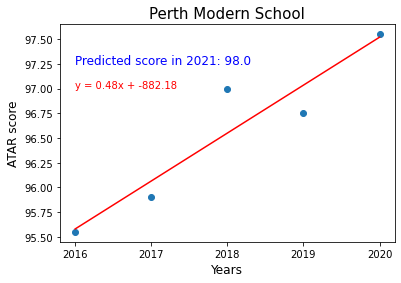

In [92]:
# Perth Modern School linear regression & prediction score in 2021
x_values = df_2020["Year"]
y_values = df_2020["Score"]
year_count = df_2020["Year"]
predict_year = 2021
plt.scatter(x_values, y_values)
plt.xticks(year_count)
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
predicted_2021 = round(slope * predict_year + intercept,2)
plt.annotate(line_eq,(2016, 97),fontsize=10,color="red")  
plt.annotate(f"Predicted score in 2021: {predicted_2021}", (2016, 97.25), fontsize=12, color="blue")
plt.xlabel("Years", fontsize = 12)
plt.ylabel("ATAR score", fontsize = 12)
plt.title("Perth Modern School", fontsize = 15)
plt.show()